<a href="https://colab.research.google.com/github/drAshcroft/MAT421_Brian/blob/main/Module_E_Section_3_2_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limits and functions: Limits define bounds of functions and accumulation points for sets

In [31]:
!pip install sympy
import sympy
import numpy as np
from sympy.plotting import plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


sympy allows a combination of symbolic and numerical methods to solve math problems

In [15]:
x = sympy.Symbol('x')
for i in np.linspace(0,2,10):
  print("Exponent of denomiator %.2f give limit of "%(i) +str( sympy.limit(sympy.sin(x)/x**i, x, 0)))


Exponent of denomiator 0.00 give limit of 0
Exponent of denomiator 0.22 give limit of 0
Exponent of denomiator 0.44 give limit of 0
Exponent of denomiator 0.67 give limit of 0
Exponent of denomiator 0.89 give limit of 0
Exponent of denomiator 1.11 give limit of oo
Exponent of denomiator 1.33 give limit of oo
Exponent of denomiator 1.56 give limit of oo
Exponent of denomiator 1.78 give limit of oo
Exponent of denomiator 2.00 give limit of oo


We can gain even more power with functions and symbolic processing

In [25]:
from sympy import * #pull in all functions without needing the module
init_printing(use_unicode=True)
x, t, z, nu = symbols('x t z nu')

display(diff(sin(x)*exp(x), x))
#unformated printing is possible
print(str(diff(sin(x)*exp(x), x)))

#pretty printing is nicer to look at
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

exp(x)*sin(x) + exp(x)*cos(x)


Composition of functions.  Functions can be chained together to create more complicated behaviors.  Sympy handles this with standard notation

Composition function


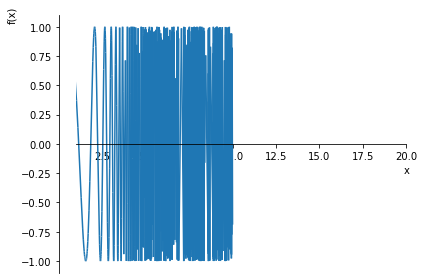

Diff of Composition function


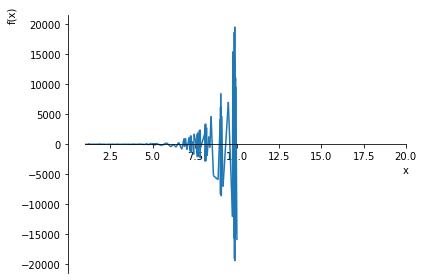

Integration of Composition function


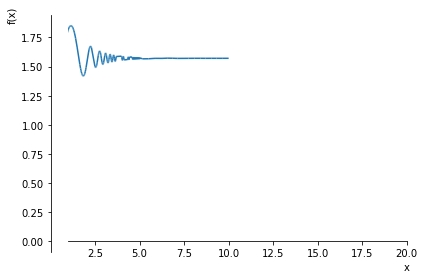

In [38]:
g=exp(x)
eq=sin(g)
print('Composition function')
display(eq)
plot(eq, xlim=(1,20))

print('Diff of Composition function')
deq=diff(eq, x)
plot(deq, xlim=(1,20))
display(deq)

print('Integration of Composition function')
ieq=integrate(eq, x)
plot(ieq, xlim=(1,20))
display(ieq)

Taylor Series allow many functions to be more easily handled:

Taylor expansion shows ok behavior near the 0


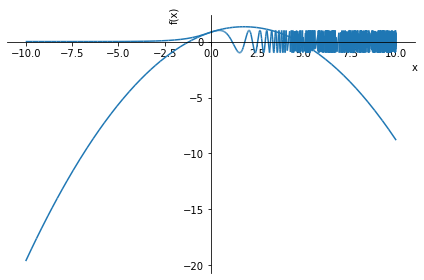

In [54]:
g=exp(x)
eq=sin(g)#define a moderately difficult equation to perform taylor expansion manually

taylorExpand = eq.series(x, 0, 3).removeO()
display(taylorExpand)

 

p1 = plot(eq, show=False)
p2 = plot(taylorExpand, show=False)
p1.append(p2[0])
print('Taylor expansion shows ok behavior near the 0')
p1.show()

Optimizers.  Computers excel at iteratively solving equations we have already seen linear regression in earlier chapters.  

SymPy offers a nice automated solution for solvign equations

In [53]:
print("solve x^3-1=0")
display(solveset(Eq(x**3 - 1, 0), x))

print("solve sin(exp(x))=0")
display(solveset(Eq(eq, 0), x))


solve x^3-1=0


solve sin(exp(x))=0


Numerical Optimizations: Computers can use a variety of methods like conjugate optimization to solve a variety problems.  Here the example is finding roots of our composite function.  Each of the methods have different ways of finding initial values and avoiding local minima, so they find different roots from the nonlinear occilating function

In [72]:
from scipy.optimize import minimize

methods=["Nelder-Mead",
"Powell",
"CG",
"BFGS",
"L-BFGS-B",
"TNC",
"COBYLA",
"SLSQP",
"trust-constr" ]

def SinExp(x):
    return np.sin(np.exp(x))

for method in methods:
    res1 = minimize(SinExp, [0],method=method)
    res2 = minimize(SinExp, [1],method=method)
    print('Root1=%.2f Root2=%.2f Method %s '%( res1.x,res2.x,method))

Root1=-786.43 Root2=1.55 Method Nelder-Mead 
Root1=1.55 Root2=1.55 Method Powell 
Root1=-12.44 Root2=1.55 Method CG 
Root1=-12.19 Root2=1.55 Method BFGS 
Root1=-11.55 Root2=1.55 Method L-BFGS-B 
Root1=-17.15 Root2=1.55 Method TNC 
Root1=1.55 Root2=1.55 Method COBYLA 
Root1=-13.78 Root2=1.55 Method SLSQP 
Root1=-18.48 Root2=1.55 Method trust-constr 


Matrix math can also be performed by optimizing a function.  Here the nearest 2X2 determinate that is equal to zero is found.  Once again, the different methods handle the complicated search space differently resulting in different solutions.  A careful hyper parameter system should be used to ensure the correct solution is selected.

In [92]:
methods=["Nelder-Mead",
"Powell",
"CG",
"BFGS",
"L-BFGS-B",
"TNC",
"COBYLA",
"SLSQP"  ]

def Det(x):
  x=np.reshape(x,newshape=(2,2))
  return np.abs(x[0,0]*x[1,1]-x[1,0]*x[0,1])

x0=np.array( [[4,5],[3,5]])
for method in methods:
    res1 = minimize(Det, x0,method=method)
    print('Root1=%.2f Method %s '%( Det(res1.x), method))

    if res1.x.shape[0]!=2:
      print('%.2f,%.2f\n%.2f,%.2f'%(res1.x[0],res1.x[1],res1.x[2],res1.x[3]))

Root1=0.00 Method Nelder-Mead 
3.83,5.31
3.24,4.49
Root1=0.00 Method Powell 
3.00,4.99
3.00,5.00
Root1=0.00 Method CG 
3.67,5.20
3.33,4.73
Root1=0.00 Method BFGS 
3.67,5.20
3.33,4.73
Root1=0.00 Method L-BFGS-B 
3.67,5.20
3.34,4.73
Root1=0.00 Method TNC 
3.67,5.28
3.21,4.62
Root1=0.00 Method COBYLA 
Root1=0.00 Method SLSQP 
3.48,4.95
3.17,4.50
